       [ v0   ]
   0 : [    1 ]
   1 : [    2 ]
   2 : [    3 ]
...
1247 : [ 1248 ]
1248 : [ 1249 ]
1249 : [ 1250 ]


TypeError: Wrong number or type of arguments for overloaded function 'Distribution_computeQuantile'.
  Possible C/C++ prototypes are:
    OT::Distribution::computeQuantile(OT::Scalar const,OT::Bool const) const
    OT::Distribution::computeQuantile(OT::Scalar const) const
    OT::Distribution::computeQuantile(OT::Point const &,OT::Bool const) const
    OT::Distribution::computeQuantile(OT::Point const &) const
    OT::Distribution::computeQuantile(OT::Scalar const,OT::Scalar const,OT::UnsignedInteger const,OT::Bool const) const
    OT::Distribution::computeQuantile(OT::Scalar const,OT::Scalar const,OT::UnsignedInteger const) const


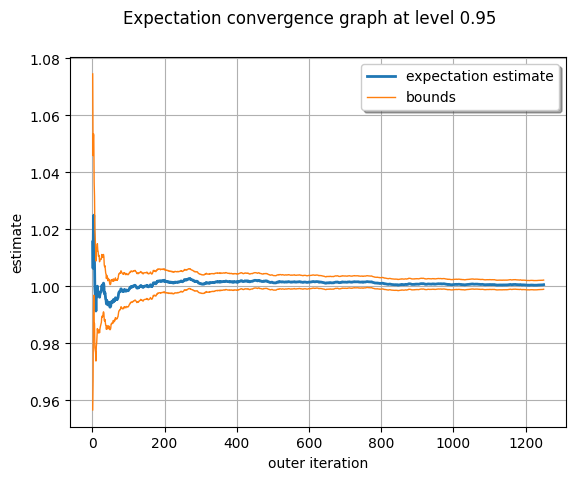

In [18]:
"""
Evaluate the mean of a random vector by simulations
===================================================
"""

import openturns as ot
import importlib.util
import sys
import os
import openturns.viewer as otv
from matplotlib import pylab as plt
import pandas as pd

# Load the flood model
module_name = "FloodModel"
file_path = "examples/FloodModel.py"
output_csv_path = "results/expectation_convergence.csv"
os.makedirs("results", exist_ok=True)

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File {file_path} does not exist.")

spec = importlib.util.spec_from_file_location(module_name, file_path)
if spec is None:
    raise ImportError(f"Could not load the module from {file_path}.")

module = importlib.util.module_from_spec(spec)
sys.modules[module_name] = module
spec.loader.exec_module(module)

function_of_interest, problem = module.model, module.problem

# Create distributions
distributions = ot.DistributionCollection()
for dist_info in problem['distributions']:
    dist_type = dist_info['type']
    params = dist_info['params']
    if dist_type == 'Uniform':
        distributions.add(ot.Uniform(*params))
    elif dist_type == 'Normal':
        distributions.add(ot.Normal(*params))
    elif dist_type == 'LogNormalMuSigma':
        distributions.add(ot.ParametrizedDistribution(ot.LogNormalMuSigma(*params)))
    elif dist_type == 'LogNormal':
        distributions.add(ot.LogNormal(*params))
    elif dist_type == 'Beta':
        distributions.add(ot.Beta(*params))
    elif dist_type == 'Gumbel':
        distributions.add(ot.Gumbel(*params))
    elif dist_type == 'Triangular':
        distributions.add(ot.Triangular(*params))
    else:
        raise ValueError(f"Unsupported distribution type: {dist_type}")

distribution = ot.ComposedDistribution(distributions)

# Define the OpenTURNS model
ot_model = ot.PythonFunction(problem['num_vars'], 1, function_of_interest)

# Create the input distribution
input_vector = ot.RandomVector(distribution)

# The output vector is a CompositeRandomVector
output_vector = ot.CompositeRandomVector(ot_model, input_vector)

# Define the algorithm
algo = ot.ExpectationSimulationAlgorithm(output_vector)
algo.setMaximumOuterSampling(80000)
algo.setBlockSize(1)
algo.setCoefficientOfVariationCriterionType("NONE")

# Run the algorithm and store the result
algo.run()
result = algo.getResult()

# Draw the convergence history
graphConvergence = algo.drawExpectationConvergence()
view = otv.View(graphConvergence)

# Save the convergence data to a CSV file
# data = graphConvergence.getDrawable(0).getData()
# sample_sizes = data[:, 0]
# mean_estimates = data[:, 1]

# # Extract bounds
# expectation_distribution = result.getExpectationDistribution()
# lower_bounds = [expectation_distribution.computeQuantile(0.025, [1]).getValues()[0][0] for _ in sample_sizes]
# upper_bounds = [expectation_distribution.computeQuantile(0.975, [1]).getValues()[0][0] for _ in sample_sizes]

# df = pd.DataFrame({
#     "Sample Size": sample_sizes,
#     "Mean Estimate": mean_estimates,
#     "Lower Bound": lower_bounds,
#     "Upper Bound": upper_bounds
# })
# df.to_csv(output_csv_path, index=False)

# Get the expected value of the mean
expectation = result.getExpectationEstimate()
print("Estimated mean of the output random vector : %.5f" % expectation[0])

# Get the variance and standard deviation of the estimated mean
expectationVariance = result.getVarianceEstimate()
print("Variance of the estimated mean of the output random vector : %.5f" % expectationVariance[0])
standardDeviation = result.getStandardDeviation()
print("Standard deviation : %.5f" % standardDeviation[0])

# The asymptotic confidence distribution of the output random vector mean estimate
expectationDistribution = result.getExpectationDistribution()
print(expectationDistribution)

# Draw the expectation distribution
graphExpectationDistribution = expectationDistribution.drawPDF()
graphExpectationDistribution.setTitle("Normal asymptotic distribution of the mean estimate")
view = otv.View(graphExpectationDistribution)

# Display all figures
plt.show()


class=CompositeRandomVector function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x1,x2,x3,x4,x5,x6,x7,y0] evaluationImplementation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,x3,x4,x5,x6,x7,y0] parameter=class=Point name=Unnamed dimension=0 values=[] gradientImplementation=class=CenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=8 values=[1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05] evaluation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,x3,x4,x5,x6,x7,y0] parameter=class=Point name=Unnamed dimension=0 values=[] hessianImplementation=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=8 values=[0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001] evaluation=class=PythonEvaluation name=OpenTURNSPythonFunction description=[x0,x1,x2,x3,x4,x5,x6,x7,y0] parameter=class=Point name=Unnamed di

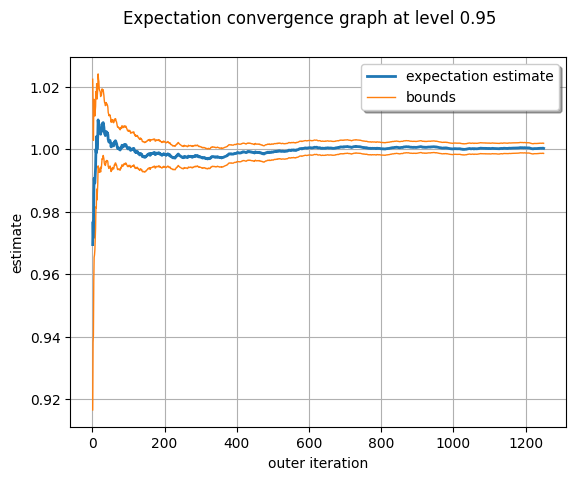

In [5]:
"""
Evaluate the mean of a random vector by simulations
===================================================
"""

import openturns as ot
import importlib.util
import sys
import os
import openturns.viewer as otv
from matplotlib import pylab as plt

# Function to load a module from a file
def load_function_and_problem(module_name, file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File {file_path} does not exist.")
    
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    if spec is None:
        raise ImportError(f"Could not load the module from {file_path}.")
    
    module = importlib.util.module_from_spec(spec)
    sys.modules[module_name] = module
    spec.loader.exec_module(module)
    return module.model, module.problem

# Function to create OpenTURNS distributions from the problem definition
def create_distributions(problem):
    distributions = ot.DistributionCollection()
    for dist_info in problem['distributions']:
        dist_type = dist_info['type']
        params = dist_info['params']
        if dist_type == 'Uniform':
            distributions.add(ot.Uniform(*params))
        elif dist_type == 'Normal':
            distributions.add(ot.Normal(*params))
        elif dist_type == 'LogNormalMuSigma':
            distributions.add(ot.ParametrizedDistribution(ot.LogNormalMuSigma(*params)))
        elif dist_type == 'LogNormal':
            distributions.add(ot.LogNormal(*params))
        elif dist_type == 'Beta':
            distributions.add(ot.Beta(*params))
        elif dist_type == 'Gumbel':
            distributions.add(ot.Gumbel(*params))
        elif dist_type == 'Triangular':
            distributions.add(ot.Triangular(*params))
        else:
            raise ValueError(f"Unsupported distribution type: {dist_type}")
    return ot.ComposedDistribution(distributions)

def main(module_name, file_path):
    function_of_interest, problem = load_function_and_problem(module_name, file_path)

    # Define the OpenTURNS model
    ot_model = ot.PythonFunction(problem['num_vars'], 1, function_of_interest)
    
    # Create the input distribution
    distribution = create_distributions(problem)

    # Create a random vector that follows the distribution of the input variables
    input_vector = ot.RandomVector(distribution)

    # The output vector is a CompositeRandomVector
    output_vector = ot.CompositeRandomVector(ot_model, input_vector)

    # Define the algorithm
    algo = ot.ExpectationSimulationAlgorithm(output_vector)
    algo.setMaximumOuterSampling(80000)
    algo.setBlockSize(1)
    algo.setCoefficientOfVariationCriterionType("NONE")

    # Run the algorithm and store the result
    algo.run()
    result = algo.getResult()

    # Draw the convergence history
    graphConvergence = algo.drawExpectationConvergence()
    view = otv.View(graphConvergence)

    # Get the expected value of the mean
    expectation = result.getExpectationEstimate()
    print("Estimated mean of the output random vector : %.5f" % expectation[0])

    # Get the variance and standard deviation of the estimated mean
    expectationVariance = result.getVarianceEstimate()
    print("Variance of the estimated mean of the output random vector : %.5f" % expectationVariance[0])
    standardDeviation = result.getStandardDeviation()
    print("Standard deviation : %.5f" % standardDeviation[0])

    # The asymptotic confidence distribution of the output random vector mean estimate
    expectationDistribution = result.getExpectationDistribution()
    print(expectationDistribution)


    # Display all figures
    plt.show()

# Run the main function
if __name__ == "__main__":
    module_name = "FloodModel"
    file_path = "examples/FloodModel.py"
    main(module_name, file_path)
